<a href="https://colab.research.google.com/github/riviera2015/MOLFARES/blob/master/SCIPY_OPTIM__EXTREMEipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def f(x):
    return x**2 + 10*np.sin(x)

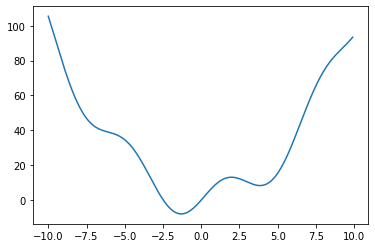

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

In [3]:
from scipy import optimize
result = optimize.minimize(f, x0=0)
result 

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [4]:
root.x

NameError: ignored

In [5]:
root2 = optimize.root(f, x0=-2.5)
root2

    fjac: array([[-1.]])
     fun: array([-1.77635684e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-4.42498482e-10])
       r: array([12.84593])
  status: 1
 success: True
       x: array([-2.47948183])

https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize

In [6]:
root = optimize.root(f, x0=1)  # our initial guess is 1

Constraints: We can constrain the variable to the interval (0, 10) using the “bounds” argument:

In [9]:
res = optimize.minimize(f, x0=1,
                        bounds=((-10, 0), ))

In [10]:
res.x 

array([-1.30644004])

1.6.5.3. Finding the roots of a scalar function


In [12]:
from scipy import optimize
def f(x):
    return -np.exp(-(x - 0.7)**2)
result = optimize.minimize_scalar(f)
result.success # check if solver was successful

x_min = result.x
x_min 

#x_min - 0.7 

0.6999999997839409

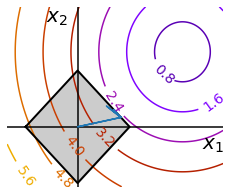

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.03:4.2:.04, -1.6:3.2:.04]
x = x.T
y = y.T

plt.figure(1, figsize=(3, 2.5))
plt.clf()
plt.axes([0, 0, 1, 1])

contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                    extent=[-2.03, 4.2, -1.6, 3.2],
                    cmap=plt.cm.gnuplot)
plt.clabel(contours,
        inline=1,
        fmt='%1.1f',
        fontsize=14)
plt.plot([-1.5,    0,  1.5,    0, -1.5],
        [   0,  1.5,    0, -1.5,    0], 'k', linewidth=2)
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
plt.axvline(0, color='k')
plt.axhline(0, color='k')

plt.text(-.9, 2.8, '$x_2$', size=20)
plt.text(3.6, -.6, '$x_1$', size=20)
plt.axis('tight')
plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

optimize.minimize(f, np.array([0, 0]), method="SLSQP",
                     constraints={"fun": constraint, "type": "ineq"})

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

plt.show()